In [2]:
import plotly.graph_objs as go  # 載入plotly套件
import numpy as np              # 載入numpy套件
import pandas as pd             # 載入pandas套件
import datetime as dt           # 載入datetime套件

# 資料前處理

In [3]:
# 讀檔
atm_df = pd.read_csv('atm_option_settle.csv')    # 價平附近履約價的選擇權收盤價
backtest_df = atm_df
settledate_df  = pd.read_csv('settle_dates.csv') # 選擇權結算日即結算合約

# 轉換日期格式
atm_df['日期'] =pd.to_datetime(atm_df['日期'])
settledate_df['最後結算日'] =pd.to_datetime(settledate_df['最後結算日'])

In [4]:
# 價平附近履約價的選擇權收盤價
# atm_df.head(3)
backtest_df.head(3)

,日期,價平買權次週每日結算價,價平買權近週每日結算價,價平賣權次週每日結算價,價平賣權近週每日結算價
0,2020-01-02,68.0,102.0,56.0,0.1
1,2020-01-03,NaN,52.0,NaN,56.0
2,2020-01-06,NaN,5.4,NaN,147.0


In [6]:
results = []

# for i in range(len(backtest_df['價平買權次週每日結算價'])-1):
#     B = backtest_df['價平買權次週每日結算價'][i]
#     C = backtest_df['價平買權近週每日結算價'][i + 1]

#     if B > 0:
#         result = round(C - B - 3 , 2)
#         # print(C,B)
#     else:
#         if i > 0:
#             C_prev = backtest_df['價平買權近週每日結算價'][i]
#             result = round(C - C_prev , 2)
#         else:
#             result = round(C , 2)  # 如果是第一行没有前一行的值，直接使用 C 值

#     results.append(result)
# print(results)
for i in range(len(backtest_df['價平賣權次週每日結算價'])-1):
    B = backtest_df['價平賣權次週每日結算價'][i]
    C = backtest_df['價平賣權近週每日結算價'][i + 1]

    if B > 0:
        result = round(B - C - 3 , 2)
        # print(C,B)
    else:
        if i > 0:
            C_prev = backtest_df['價平賣權近週每日結算價'][i]
            result = round(C_prev - C , 2)
        else:
            result = round(C , 2)  # 如果是第一行没有前一行的值，直接使用 C 值

    results.append(result)
print(results)
results.insert(0, 0)
# results = [-x for x in results]
backtest_df['做空價平賣權近週報酬(點數)'] = results

backtest_df['做空價平賣權近週報酬(金額)'] = backtest_df['做空價平賣權近週報酬(點數)']*50*2

[-3.0, -91.0, -78.0, -35.0, 67.0, 9.0, 18.5, 0.6, 0.8, -1.0, 18.0, 18.5, -567.5, 49.5, -33.5, 68.1, 7.8, 64.5, -27.5, 12.0, 35.6, 8.2, 8.0, 32.0, 6.5, -76.5, 116.9, -15.0, -24.0, -116.0, 30.0, -115.0, -79.0, -35.0, 133.0, 68.0, 62.5, -101.5, -239.0, 45.0, -103.0, -293.0, -317.0, -335.0, -310.0, -60.0, -283.0, 405.0, -100.0, 250.5, 9.3, 37.0, 0.0, 63.0, 56.5, 34.4, 166.0, 14.6, 1.3, 7.0, 43.0, -7.0, 101.6, 4.3, 6.0, 74.5, 4.5, -62.0, 69.0, 51.0, 5.0, 53.8, 4.4, 0.7, 73.0, -88.0, 90.0, 24.9, 45.0, 25.0, 27.5, 3.1, 7.3, -92.0, 63.0, -22.0, 99.0, 53.0, 43.5, -78.5, 73.0, 45.3, 6.6, -25.0, 17.0, 69.5, 15.0, 6.3, 31.0, 36.0, 15.3, 3.6, 1.0, -123.0, -80.0, -152.0, 292.0, 4.0, 21.0, 15.0, 14.0, 9.8, 3.0, -33.0, 74.0, 10.8, 34.0, 13.0, 7.9, 1.5, 0.5, 22.0, -74.0, 129.5, 8.5, 20.9, 0.0, 20.5, 19.0, 23.7, 1.6, -10.0, -64.0, 119.0, 3.5, 11.4, 47.0, 1.5, 2.5, 40.9, 2.0, 28.0, -8.0, 42.0, -5.0, -15.5, 41.0, 34.5, 36.0, 3.2, 3.2, -325.0, 236.0, 50.0, 99.0, 37.8, -5.0, -21.0, -40.0, 88.0, -15.0, 23.0,

In [30]:
# 初始資金100萬
capital = 1000000
# 初始化策略累積資金
backtest_df.loc[0, '策略累積資金(金額)'] = capital
results = []
backtest_df['進場口數']=4
# for i in range(len(backtest_df['價平買權次週每日結算價'])-1):
#     B = backtest_df['價平買權次週每日結算價'][i]
#     C = backtest_df['價平買權近週每日結算價'][i + 1]

#     if B > 0:
#         result = round(C - B - 3 , 2)
#         # print(C,B)
#     else:
#         if i > 0:
#             C_prev = backtest_df['價平買權近週每日結算價'][i]
#             result = round(C - C_prev , 2)
#         else:
#             result = round(C , 2)  # 如果是第一行没有前一行的值，直接使用 C 值

#     results.append(result)
# print(results)
for i in range(len(backtest_df['價平賣權次週每日結算價'])-1):
    backtest_df['進場口數'][i+1] = backtest_df['進場口數'][i]
    B = backtest_df['價平賣權次週每日結算價'][i]
    C = backtest_df['價平賣權近週每日結算價'][i + 1]

    if B > 0:
        result = round(B - C - 3 , 2)
        backtest_df['進場口數'][i+1] = round(backtest_df.loc[i, '策略累積資金(金額)']/250000)
        # print(C,B)
    else:
        if i > 0:
            C_prev = backtest_df['價平賣權近週每日結算價'][i]
            result = round(C_prev - C , 2)
        else:
            result = round(C , 2)  # 如果是第一行没有前一行的值，直接使用 C 值
    
    backtest_df.loc[i+1, '策略累積資金(金額)'] = backtest_df.loc[i, '策略累積資金(金額)']+result*backtest_df['進場口數'][i+1]*50


    results.append(result)
print(results)
results.insert(0, 0)
# results = [-x for x in results]
backtest_df['做空價平賣權近週報酬(點數)'] = results



[-3.0, -91.0, -78.0, -35.0, 67.0, 9.0, 18.5, 0.6, 0.8, -1.0, 18.0, 18.5, -567.5, 49.5, -33.5, 68.1, 7.8, 64.5, -27.5, 12.0, 35.6, 8.2, 8.0, 32.0, 6.5, -76.5, 116.9, -15.0, -24.0, -116.0, 30.0, -115.0, -79.0, -35.0, 133.0, 68.0, 62.5, -101.5, -239.0, 45.0, -103.0, -293.0, -317.0, -335.0, -310.0, -60.0, -283.0, 405.0, -100.0, 250.5, 9.3, 37.0, 0.0, 63.0, 56.5, 34.4, 166.0, 14.6, 1.3, 7.0, 43.0, -7.0, 101.6, 4.3, 6.0, 74.5, 4.5, -62.0, 69.0, 51.0, 5.0, 53.8, 4.4, 0.7, 73.0, -88.0, 90.0, 24.9, 45.0, 25.0, 27.5, 3.1, 7.3, -92.0, 63.0, -22.0, 99.0, 53.0, 43.5, -78.5, 73.0, 45.3, 6.6, -25.0, 17.0, 69.5, 15.0, 6.3, 31.0, 36.0, 15.3, 3.6, 1.0, -123.0, -80.0, -152.0, 292.0, 4.0, 21.0, 15.0, 14.0, 9.8, 3.0, -33.0, 74.0, 10.8, 34.0, 13.0, 7.9, 1.5, 0.5, 22.0, -74.0, 129.5, 8.5, 20.9, 0.0, 20.5, 19.0, 23.7, 1.6, -10.0, -64.0, 119.0, 3.5, 11.4, 47.0, 1.5, 2.5, 40.9, 2.0, 28.0, -8.0, 42.0, -5.0, -15.5, 41.0, 34.5, 36.0, 3.2, 3.2, -325.0, 236.0, 50.0, 99.0, 37.8, -5.0, -21.0, -40.0, 88.0, -15.0, 23.0,

/var/folders/nm/qsv7jp0x4gxdpcssmk1d_bq00000gn/T/ipykernel_91936/4206328267.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nm/qsv7jp0x4gxdpcssmk1d_bq00000gn/T/ipykernel_91936/4206328267.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nm/qsv7jp0x4gxdpcssmk1d_bq00000gn/T/ipykernel_91936/4206328267.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nm/qsv7jp0x4gxdpcssmk1d_bq00000gn/T/ipy

<Axes: >

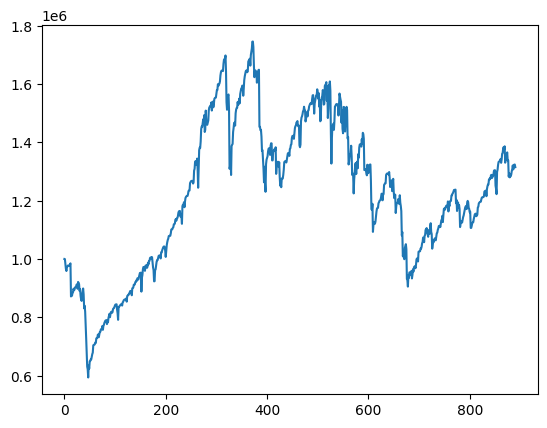

In [33]:
backtest_df['策略累積資金(金額)'].plot()
# backtest_df[backtest_df['策略累積資金(金額)'] > 1125000].iloc[:20]

In [ ]:
# put/call ratio
# pcr_df.head(3)
print(backtest_df['做空價平賣權近週報酬(點數)'],backtest_df['做空價平賣權近週報酬(金額)'])

# 績效評估

In [7]:
# 初始資金100萬
capital = 1000000
# 初始化策略累積資金
backtest_df.loc[0, '策略累積資金(金額)'] = capital


# 開始累積
for i in range(1, len(backtest_df)):
    backtest_df.loc[i, '策略累積資金(金額)'] = backtest_df.loc[i-1, '策略累積資金(金額)']+backtest_df.loc[i, '做空價平賣權近週報酬(金額)']

backtest_df.head(5)

,日期,價平買權次週每日結算價,價平買權近週每日結算價,價平賣權次週每日結算價,價平賣權近週每日結算價,做空價平賣權近週報酬(點數),做空價平賣權近週報酬(金額),策略累積資金(金額)
0,2020-01-02,68.0,102.0,56.0,0.1,0.0,0.0,1000000.0
1,2020-01-03,NaN,52.0,NaN,56.0,-3.0,-300.0,999700.0
2,2020-01-06,NaN,5.4,NaN,147.0,-91.0,-9100.0,990600.0
3,2020-01-07,NaN,0.6,NaN,225.0,-78.0,-7800.0,982800.0
4,2020-01-08,136.0,0.1,99.0,260.0,-35.0,-3500.0,979300.0


In [38]:
# 計算每日報酬率
backtest_df['策略每日報酬率'] = backtest_df['策略累積資金(金額)'].pct_change()
backtest_df.loc[0, '策略每日報酬率'] = 0  # 初始化第一天策略每日報酬率

# 計算累積報酬率
backtest_df['策略累積報酬率'] = (1 + backtest_df['策略每日報酬率']).cumprod()-1
backtest_df.loc[0, '策略累積報酬率'] = 0  # 初始化第一天策略累積報酬率

# 計算Drawdown
# 計算每個時間點的最大價格
backtest_df['每個時點最大策略累積資金(金額)'] = backtest_df['策略累積資金(金額)'].cummax()
# 計算每個時間點的 Drawdown
backtest_df['Drawdown'] = (backtest_df['策略累積資金(金額)'] - backtest_df['每個時點最大策略累積資金(金額)']) / backtest_df['每個時點最大策略累積資金(金額)']
backtest_df.to_csv('/Users/shawn/Github/M1/價內shortPut策略程式/backtest.csv')
backtest_df.head(5)

,日期,價平買權次週每日結算價,價平買權近週每日結算價,價平賣權次週每日結算價,價平賣權近週每日結算價,做空價平賣權近週報酬(點數),做空價平賣權近週報酬(金額),策略累積資金(金額),策略每日報酬率,策略累積報酬率,每個時點最大策略累積資金(金額),Drawdown,進場口數
0,2020-01-02,68.0,102.0,56.0,0.1,0.0,0.0,1000000.0,0.000000,0.0000,1000000.0,0.0000,4
1,2020-01-03,NaN,52.0,NaN,56.0,-3.0,-300.0,999400.0,-0.000600,-0.0006,1000000.0,-0.0006,4
2,2020-01-06,NaN,5.4,NaN,147.0,-91.0,-9100.0,981200.0,-0.018211,-0.0188,1000000.0,-0.0188,4
3,2020-01-07,NaN,0.6,NaN,225.0,-78.0,-7800.0,965600.0,-0.015899,-0.0344,1000000.0,-0.0344,4
4,2020-01-08,136.0,0.1,99.0,260.0,-35.0,-3500.0,958600.0,-0.007249,-0.0414,1000000.0,-0.0414,4


In [10]:
from plotly.subplots import make_subplots  #載入plotly畫子圖的套件

# 定義繪製策略損益圖方法
def draw_PnL(trace1, trace2,  title1, title2):
    
    # 打開子畫布
    fig = make_subplots(rows=2, cols=1, subplot_titles=(title1, title2), row_heights=[0.75, 0.25], shared_xaxes=True, vertical_spacing=0.1)
    
    # 帶入資料到子畫布的特定位置
    fig.add_trace(trace1, row=1, col=1)
    fig.add_trace(trace2, row=2, col=1)
    
    # 設定子畫布共同屬性
    fig.update_layout(
        title='做空賣權策略績效', # 設定圖表標題名稱
        plot_bgcolor='white', # 設定底色為白色
    )
    
    # 設定子畫布屬性
    fig.update_xaxes(row=1, col=1, linecolor='black', linewidth=2, showgrid=True, gridcolor='lightgrey')
    fig.update_yaxes(title_text="損益(%)", row=1, col=1, linecolor='black', linewidth=2, showgrid=True, gridcolor='lightgrey', zerolinecolor='darkgrey')
    fig.update_xaxes(title_text="日期", row=2, col=1, linecolor='black', linewidth=2, showgrid=True, gridcolor='lightgrey')
    fig.update_yaxes(title_text="損益(%)", row=2, col=1, linecolor='black', linewidth=2, showgrid=True, gridcolor='lightgrey', zerolinecolor='darkgrey')

    #展示圖表
    fig.show()
    
    return

In [11]:
# 建立plotly損益曲線
trace1 = go.Scatter(x=backtest_df['日期'], 
                    y=backtest_df['策略累積報酬率']*100, 
                    mode='lines', 
                    name='做空賣權策略損益', 
                    line=dict(color='blue')
                    )
trace2 = go.Scatter(x=backtest_df['日期'], 
                    y=backtest_df['Drawdown']*100, 
                    mode='lines', 
                    name='Drawdown', 
                    line=dict(color='red')
                    )

# 繪製策略損益圖
draw_PnL(trace1, trace2, '策略損益曲線', 'Drawdown')

In [39]:
# 計算績效指標
total_return = backtest_df.loc[len(backtest_df)-1, '策略累積報酬率']
annualized_return = (1+backtest_df.loc[len(backtest_df)-1, '策略累積報酬率'])**(252/len(backtest_df))-1  # 年化報酬率
annualized_volatility = np.std(backtest_df['策略每日報酬率'])*np.sqrt(252)  # 年化波動率
sharpe_ratio = annualized_return/annualized_volatility  # 年化夏普值
max_drawdown = backtest_df['Drawdown'].min()  # 最大回撤(MDD)

print("總報酬率: {}%".format(round(total_return*100,2)))
print("年化報酬率: {}%".format(round(annualized_return*100,2)))
print("年化波動率: {}%".format(round(annualized_volatility*100,2)))
print("年化夏普值: {}".format(round(sharpe_ratio,2))) 
print("最大回撤(MDD): {}%".format(round(max_drawdown*100,2)))

總報酬率: 31.49%
年化報酬率: 8.05%
年化波動率: 32.25%
年化夏普值: 0.25
最大回撤(MDD): -48.16%


# 資料前處理